# Data Cleaning for general purpose analyzing

#### The following site was used to perform data cleaning: https://opendata.cityofnewyork.us/data/#datasetscategory

## Step 1 : Importing libraries and the data set:

In [102]:
%matplotlib inline

import os  
#Importing os module in python provides a way of using system depended functionality.

import numpy as np 
#Numpy is the core library for scientific computing in Python. np is an alias pointing to numpy

import pandas as pd 
#Pandas is widely used Python library in data science mainly used for data munging.

import matplotlib as plt

import seaborn as sns 
#Seaborn is a Python visualization library based on matplotlib providing a high-level interface for drawing attractive statistical graphics.


In [103]:
#Reading data of csv file downloaded from one of the data set sites

fp = 'C:/Vaibhavi/IDS/SAT_Results.csv'
results = pd.read_csv(fp)

results.head()
#head(): displays the top rows of the data, in this case top 20

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


### Output 1 :
From the first glance at the dataset we can say that , our data set has 6 columns which include the DBNs, School names ,marks scored in Critcal Reasoning, Math  ,writing and the no of test takers at each school.

## Step 2: Quick Data Exploration

In [104]:
#Renaming the column names as preferred for further use

column_names = {'DBN': 'DBN',  'SCHOOL NAME':'School Name',
                 'Num of SAT Test Takers': 'No of SAT Test Takers', 'SAT Critical Reading Avg. Score':'SAT Critical Reading Avg Score',
                'SAT Math Avg. Score':'SAT Math Avg Score',
                'SAT Writing Avg. Score':'SAT Writing Avg Score'}   

results = (results.rename(columns=column_names)
    .dropna(thresh=4)
    [['DBN', 'School Name', 'No of SAT Test Takers', 'SAT Critical Reading Avg Score', 'SAT Math Avg Score','SAT Writing Avg Score']]
        .set_index('DBN', append=True)
     .rename_axis(["Sr No", "DBN"])
    .sort_index())

#rename() : function takes as argument the dict of new column names
#dropna() : Returns object with labels on given axis omitted where alternately any or all of the data are missing
#assign() : function helps to change the date format using to_datetime function of pandas
#set_index() :Sets the DataFrame index (row labels) using one or more existing columns and by default yields a new object.
#rename_axis() :Alters index and / or columns using input function or functions.A scalar or list-like for mapper will alter the Index.name or MultiIndex.names attribute.
#sort_index() : Sorts object by labels (along an axis)
 
results.head(600) 

,,School Name,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
Sr No,DBN,,,,,
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628


### Output 2:
The above output shows that the column names are now changed.
However, after taking a closed look at the numeric data, we can see that in many rows the string 's' appears instead of numeric values.
Hence, we can conclude that we need to investigate and address the missing values in the dataset.

## Step 3: Data Munging 

During the exploration of the data we found a few problems with the data which needs to be addressed before we can call it a good data model.

The following are the problems we found:

1. There are a few rows in the dataset that contain string 's' in numeric columns.
2. We need to estimate these missing values wisely in order to perform futher analysis.

In [105]:
#Stripping put the 's' strings in the data as it is incorrect information which is of no use to us:

results['No of SAT Test Takers'] = results['No of SAT Test Takers'].map(lambda x: x.lstrip('s'))
                                                                        
results['SAT Critical Reading Avg Score'] = results['SAT Critical Reading Avg Score'].map(lambda x: x.lstrip('s'))

results['SAT Math Avg Score'] = results['SAT Math Avg Score'].map(lambda x: x.lstrip('s'))

results['SAT Writing Avg Score'] = results['SAT Writing Avg Score'].map(lambda x: x.lstrip('s'))

#syntax of map() :map(function_to_apply, list_of_inputs)
#map() applies a function to all the items in an input_list.

results.head(600)


,,School Name,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
Sr No,DBN,,,,,
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628


### Output 3:
The above output shows that the using the lstrip() function , the unwanted strings 's' have been removed from the dataset.

## Step 4 : Data Exploration

In [106]:
results.apply(lambda x: sum(x.isnull()),axis=0)

#syntax : apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)
#Return type of apply() depends on whether passed function aggregates, or the reduce argument if the DataFrame is empty.

School Name                       0
No of SAT Test Takers             0
SAT Critical Reading Avg Score    0
SAT Math Avg Score                0
SAT Writing Avg Score             0
dtype: int64

### Output 4: 
Here we were checking the missing values of the dataset.

However, it seems even though we trimmed the string 's' in our dataset we still find string '' to be present.

Due to this ,although we know we have some missing values in our dataset , we get 0 null values.

In [107]:
results.info()

#The info() provides concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 478 entries, (0, 01M292) to (477, 79X490)
Data columns (total 5 columns):
School Name                       478 non-null object
No of SAT Test Takers             478 non-null object
SAT Critical Reading Avg Score    478 non-null object
SAT Math Avg Score                478 non-null object
SAT Writing Avg Score             478 non-null object
dtypes: object(5)
memory usage: 28.1+ KB


### Output 5:
The info() functions also can be used to check the data for null values.
However, as we already know since our data has the '' string present instead of null we are unable to detect them through this function.

In [108]:
tidy = pd.melt(results.reset_index(),
               id_vars=['Sr No', 'DBN'], value_vars=['No of SAT Test Takers','SAT Math Avg Score','SAT Writing Avg Score'],
               value_name='sat')

#pd.melt : “Unpivots” a DataFrame from wide format to long format, optionally leaving identifier variables set.

tidy.head(50)

,Sr No,DBN,variable,sat
0,0,01M292,No of SAT Test Takers,29
1,1,01M448,No of SAT Test Takers,91
2,2,01M450,No of SAT Test Takers,70
3,3,01M458,No of SAT Test Takers,7
4,4,01M509,No of SAT Test Takers,44
5,5,01M515,No of SAT Test Takers,112
6,6,01M539,No of SAT Test Takers,159
7,7,01M650,No of SAT Test Takers,18
8,8,01M696,No of SAT Test Takers,130
9,9,02M047,No of SAT Test Takers,16


## Step 5 : How to check missing values in dataset?

In [109]:
#For Non numerical values we can also look at frequency distribution to understand whether they make sense or not. 

results['School Name'].value_counts()

BROOKLYN LATIN SCHOOL, THE                                              1
RICHARD R. GREEN HIGH SCHOOL OF TEACHING                                1
SCHOOL FOR LEGAL STUDIES                                                1
NYC ISCHOOL                                                             1
HIGH SCHOOL OF WORLD CULTURES                                           1
HIGH SCHOOL FOR MEDIA AND COMMUNICATIONS                                1
BANANA KELLY HIGH SCHOOL                                                1
PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE                        1
BROOKLYN STUDIO SECONDARY SCHOOL                                        1
THE CINEMA SCHOOL                                                       1
LEADERSHIP AND PUBLIC SERVICE HIGH SCHOOL                               1
HARVEY MILK HIGH SCHOOL                                                 1
BRONX REGIONAL HIGH SCHOOL                                              1
PROGRESS HIGH SCHOOL FOR PROFESSIONAL 

### Output 6 :
From the above output we can say that frequency distribution of the School Name column looks good and has no issues.

In [110]:
#We know that we were unable to find number of numeric missing values in each column.
#This is due to the presence of string ''.
#Thus, we will replace it with NAN.
#NAN stands for 'not a number'

results['No of SAT Test Takers'].replace('', np.nan, inplace=True)
results['SAT Critical Reading Avg Score'].replace('', np.nan, inplace=True)
results['SAT Math Avg Score'].replace('', np.nan, inplace=True)
results['SAT Writing Avg Score'].replace('', np.nan, inplace=True)

results.head(600)

,,School Name,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
Sr No,DBN,,,,,
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628


### Output 7:
From the above output we can confirm that we have successfully converted the '' string values to NAN in order to track the missing data.

In [111]:
#Some more data exploration:

results.describe()
#syntax of result(): describe(percentiles=None, include=None, exclude=None)
#describe() :Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,School Name,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
count,478,421,421,421,421
unique,478,174,163,172,162
top,"BROOKLYN LATIN SCHOOL, THE",54,398,385,368
freq,1,10,8,9,9


### Output 7:
The above output shows that we are missing (478-421)i.e 57 rows in the columns (No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score).

In [112]:
#Checking the missing data again. 
results.info()

#The below output shows that we are missing 57 values from all numeric coumns except School Name

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 478 entries, (0, 01M292) to (477, 79X490)
Data columns (total 5 columns):
School Name                       478 non-null object
No of SAT Test Takers             421 non-null object
SAT Critical Reading Avg Score    421 non-null object
SAT Math Avg Score                421 non-null object
SAT Writing Avg Score             421 non-null object
dtypes: object(5)
memory usage: 28.1+ KB


In [113]:
results.apply(lambda x: sum(x.isnull()),axis=0)

#The apply() now correctly shows the missing data in our dataset which is 57 for 4 columns

School Name                        0
No of SAT Test Takers             57
SAT Critical Reading Avg Score    57
SAT Math Avg Score                57
SAT Writing Avg Score             57
dtype: int64

## Step 7: Data Munging in Python : Using Pandas

During exploration of data we found the problem of missing data in our data set.
This problem will be addressed now.

There are various ways to fill the missing data :
1. Delete the rows missing data. One can use mask() function to get rid of the missing data.
2. Impute missing values

Simplest way to handle the missing values in our case would be filling the missing data with mean values.

In [114]:
#We cannot directly directly replcae the NAN with mean values  as the function needs the data to be of float data type.

results['No of SAT Test Takers'] = results['No of SAT Test Takers'].astype(float)
results['SAT Critical Reading Avg Score'] = results['SAT Critical Reading Avg Score'].astype(float)
results['SAT Math Avg Score'] = results['SAT Math Avg Score'].astype(float)
results['SAT Writing Avg Score'] = results['SAT Writing Avg Score'].astype(float)

#astype() here is used to typecast the data to the desired data type

In [115]:
#Here we are replacing our missing values 'NAN' with the mean of the columns using fillna()

results['No of SAT Test Takers'].fillna(results['No of SAT Test Takers'].mean(), inplace=True)
results['SAT Critical Reading Avg Score'].fillna(results['SAT Critical Reading Avg Score'].mean(), inplace=True)
results['SAT Math Avg Score'].fillna(results['SAT Math Avg Score'].mean(), inplace=True)
results['SAT Writing Avg Score'].fillna(results['SAT Writing Avg Score'].mean(), inplace=True)

#syntaax: fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
#Fill NA/NaN values using the specified method

results.head(600)

,,School Name,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
Sr No,DBN,,,,,
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.000000,355.000000,404.000000,363.000000
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.000000,383.000000,423.000000,366.000000
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.000000,377.000000,402.000000,370.000000
3,01M458,FORSYTH SATELLITE ACADEMY,7.000000,414.000000,401.000000,359.000000
4,01M509,MARTA VALLE HIGH SCHOOL,44.000000,390.000000,433.000000,384.000000
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112.000000,332.000000,557.000000,316.000000
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159.000000,522.000000,574.000000,525.000000
7,01M650,CASCADES HIGH SCHOOL,18.000000,417.000000,418.000000,411.000000
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130.000000,624.000000,604.000000,628.000000


### Output 8:
We can see from the above output that we have sucessfully converted our data to float data type.

Also all the missing values are now replaced with means.

In [116]:
#Converting the data back to int datatype for easy view of values.Also as such our original data was of int data type.

results['No of SAT Test Takers'] = results['No of SAT Test Takers'].astype(int)
results['SAT Critical Reading Avg Score'] = results['SAT Critical Reading Avg Score'].astype(int)
results['SAT Math Avg Score'] = results['SAT Math Avg Score'].astype(int)
results['SAT Writing Avg Score'] = results['SAT Writing Avg Score'].astype(int)

results.head(600)

,,School Name,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
Sr No,DBN,,,,,
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628


In [117]:
#Checking if the missing values are now gone:

results.apply(lambda x: sum(x.isnull()),axis=0) 

School Name                       0
No of SAT Test Takers             0
SAT Critical Reading Avg Score    0
SAT Math Avg Score                0
SAT Writing Avg Score             0
dtype: int64

In [118]:
results.info()
#We no more see misisng values in the output.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 478 entries, (0, 01M292) to (477, 79X490)
Data columns (total 5 columns):
School Name                       478 non-null object
No of SAT Test Takers             478 non-null int32
SAT Critical Reading Avg Score    478 non-null int32
SAT Math Avg Score                478 non-null int32
SAT Writing Avg Score             478 non-null int32
dtypes: int32(4), object(1)
memory usage: 20.7+ KB


## Step 8: Distribution analysis

We will study the distribution of all the variables to find out if there are any outliers    

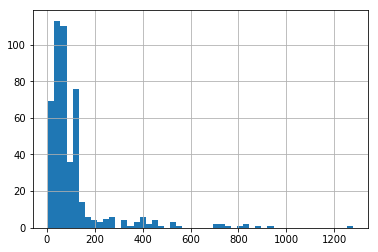

In [119]:
results['No of SAT Test Takers'].hist(bins=50)

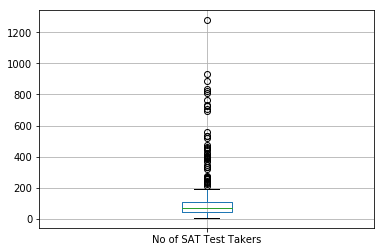

In [120]:
#Rechecking for extreme values

results.boxplot(column='No of SAT Test Takers')

### Output 9:
We can see from the graph that there is one outlier in our graph of "No of SAT Test Takers".
However, we cannot confirm whether this is incorrect data or an exception.

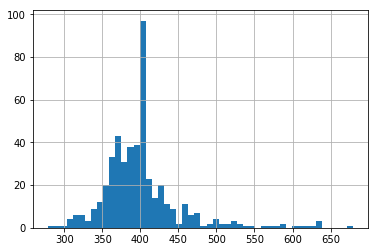

In [91]:
results['SAT Critical Reading Avg Score'].hist(bins=50)

### Output 10:
The above hostogram shows that there few outliers in our SAT critical Reading Avg Score.

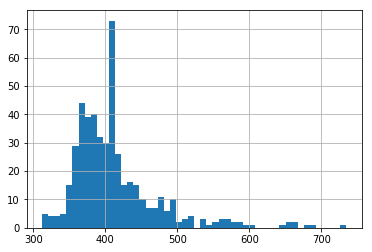

In [95]:
results['SAT Math Avg Score'].hist(bins=50)

### Output 11:
The above hostogram shows that there few outliers in our SAT Math Avg Score.

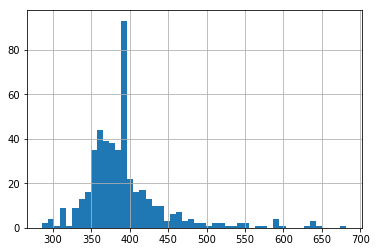

In [98]:
results['SAT Writing Avg Score'].hist(bins=50)

### Output 12:
The above hostogram shows that there few outliers in our SAT Writing Avg Score.

In [82]:
results.describe()

,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score
count,478.000000,478.000000,478.000000,478.000000
mean,110.282427,400.748954,413.324268,393.868201
std,145.945805,53.301678,60.697047,55.021259
min,6.000000,279.000000,312.000000,286.000000
25%,44.250000,370.000000,375.000000,363.000000
50%,68.000000,397.500000,402.500000,387.000000
75%,110.000000,411.750000,426.750000,403.000000
max,1277.000000,679.000000,735.000000,682.000000


### Output 13:

The describe() function this time provides complete summary, as we have convereted all our data to int datatype.

We can infer from the output that, 

1. No data is anymore missing in our dataset.

2. We have found some outliers for the numeric values No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score. However,these outliers are not generated due to filling of missing values since we used mean to enter these values.

we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

## How to treat for extreme values in distribution of numeric variables?

Picking the first coulmn of No of Test Takers:
Since the extreme values are practically possible, i.e. some schools might have large number of studeents resulting in large number of test takers.
So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

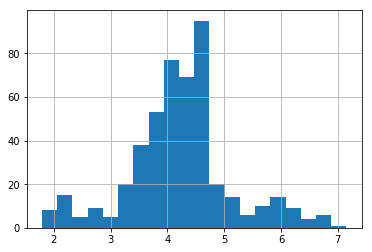

In [121]:
results['No of SAT Test Takers'] = np.log(results['No of SAT Test Takers'])
results['No of SAT Test Takers'].hist(bins=20)

### Output 14:
Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

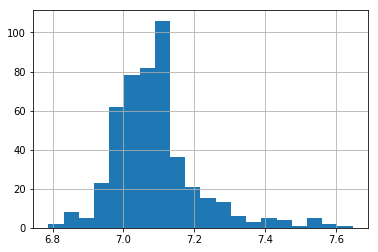

In [123]:
#Coming to Others Scores. One intuition can be that some test takers have lower scores in one section but strong in others. So it might be a good idea to combine all scores and take a log transformation of the same

results['TotalScore'] = results['SAT Critical Reading Avg Score'] + results['SAT Math Avg Score']+results['SAT Writing Avg Score']
results['TotalScore_log'] = np.log(results['TotalScore'])
results['TotalScore_log'].hist(bins=20) 

### Output 15:
Now we see that the distribution is much better than before.

In [160]:
results.describe()

,No of SAT Test Takers,SAT Critical Reading Avg Score,SAT Math Avg Score,SAT Writing Avg Score,TotalScore,TotalScore_log
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,4.243657,400.748954,413.324268,393.868201,1207.941423,7.088701
std,0.923420,53.301678,60.697047,55.021259,163.777757,0.122509
min,1.791759,279.000000,312.000000,286.000000,887.000000,6.787845
25%,3.789808,370.000000,375.000000,363.000000,1111.000000,7.013016
50%,4.219508,397.500000,402.500000,387.000000,1185.500000,7.077920
75%,4.700480,411.750000,426.750000,403.000000,1240.000000,7.122867
max,7.152269,679.000000,735.000000,682.000000,2096.000000,7.647786


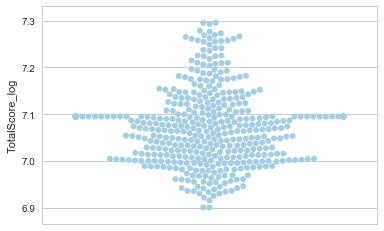

In [162]:
sns.set(style="whitegrid")
sns.swarmplot(y="TotalScore_log", data=results.query('6.9<TotalScore_log<7.3'),size=6,palette ='Paired')

#Plotting a graph to see the scores around the mean which is most of them.

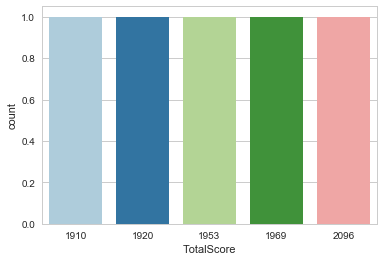

In [166]:
sns.countplot(x='TotalScore',data=results.query('TotalScore>1900'),palette="Paired") 
#Plotting the top total scores above 1900 

### Output 16:
There are only 5 scores above 1900.

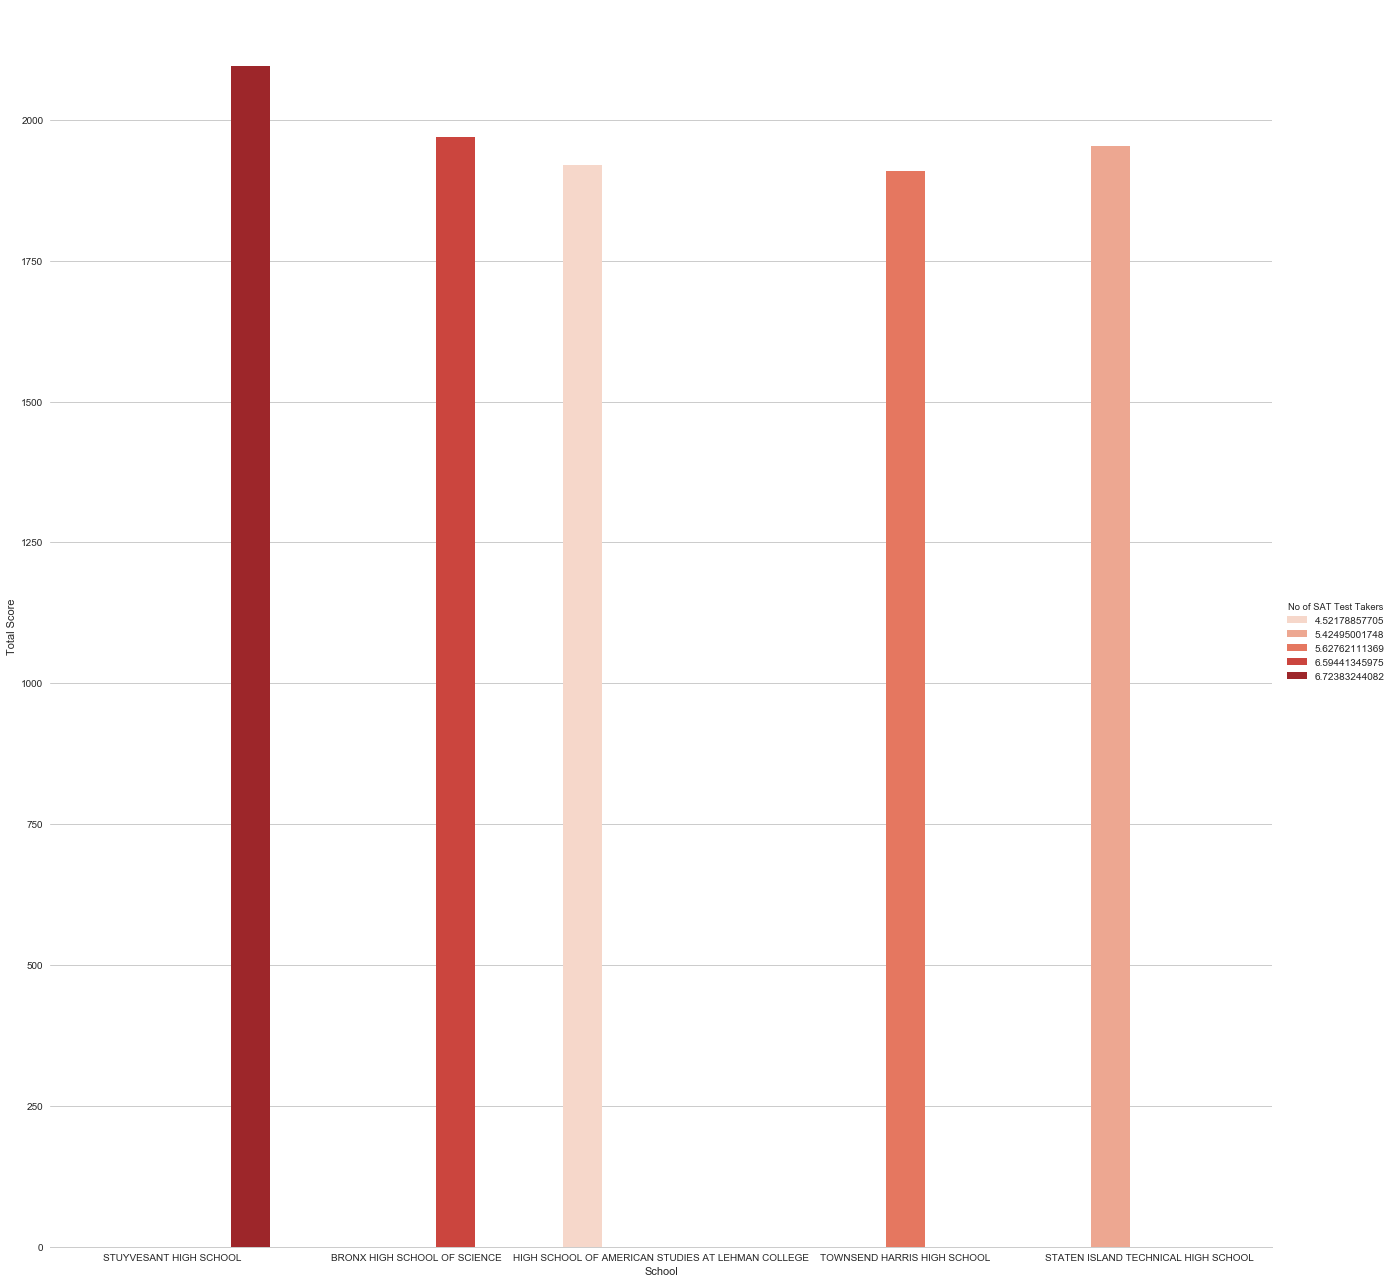

In [163]:
sns.set(style="whitegrid")
#Using the the function set , the background is set to white

#factorplot():The default plot that is shown is a point plot, but other seaborn categorical plots can be chosen with the kind parameter, including box plots, violin plots, bar plots, or strip plots.

#Drawing a nested barplot to show Attendance and Win-Loss for games
g = sns.factorplot(x="School Name", y="TotalScore", hue="No of SAT Test Takers",  data=results.query('TotalScore>1900'),
                   size=18, kind="bar", palette="Reds")

g.despine(left=True) 
#despine() : it removes the top and rigth spine from the graph. Left =true removes the left spine.

# set_ylabels(): It is used to lable the axis of the graph with appropriate names
g.set_ylabels("Total Score")
g.set_xlabels("School")


### Output 17:
The above output shows the Schools that had the top 5 total scores along with the score

## References :

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4

https://opendata.cityofnewyork.us/data/#datasetscategory